In [2]:
import pandas as pd
import numpy as np

In [1]:
papers = pd.concat([
  pd.read_pickle('/disks/qnap3/shared/scopus-22/data/paper_detail/num_cited.pickle'),
  pd.read_pickle('/disks/qnap3/shared/scopus-22/data/paper_detail/doi.pickle'),
  pd.read_pickle('/disks/qnap3/shared/scopus-22/data/paper_detail/title.pickle'),
  pd.read_pickle('/disks/qnap3/shared/scopus-22/data/paper_detail/journal.pickle'),
  # pd.read_pickle('/disks/qnap3/shared/scopus-22/data/paper_detail/authids.pickle'),
  pd.read_pickle('/disks/qnap3/shared/scopus-22/data/paper_detail/year.pickle'),
], axis = "columns")
print(papers.head())

papers = papers[papers["doi"]!="NO DOI"]
journal_names = pd.read_pickle('/disks/qnap3/shared/scopus-22/data/id_names/journal_info.pickle')
journal_names.head()

     source                                                doi  \
107    12.0    10.1175/1520-0442(1997)010<2184:ASAIUF>2.0.CO;2   
110     6.0                                  10.1063/1.1285965   
116    32.0                            10.1103/PhysRevE.56.623   
117    77.0                                     10.1086/304826   
118    55.0  10.1002/(SICI)1521-4109(199907)11:9<623::AID-E...   

                                                 title      journal  year  
107  Assessing surface-atmosphere interactions usin...        13550  1997  
110  Symmetry of quantum phase space in a degenerat...        27430  2000  
116  Friction in strongly confined polymer melts: E...  21100855841  1997  
117  Nearby young dwarf galaxies: Primordial gas an...        26765  1997  
118  Determination of iodate in salt samples with a...        23979  1999  


,name,country
journalid,,
0,NO SOURCENAME,NO SOURCECOUNTRY
12000,Journal of Technology in Counseling,usa
12001,Journal of the Experimental Analysis of Behavior,NO SOURCECOUNTRY
12002,Journal of the History of the Behavioral Sciences,NO SOURCECOUNTRY
12003,Reconstructionist,usa


In [2]:
journal_subset = [
  # Disciplinal
  # Politics
  # 15557 # APSR
  # 20333 #	Journal of Politics	gbr
  # 15555	# American Journal of Political Science	gbr
  # 25725	# World Politics	NO SOURCECOUNTRY
  # 13447	# Comparative Political Studies	usa

  # Physics 
  # 29143,85318,29465,29459, # Phisical Review A-D
  # 21100874237,21100874236,21100829284,21100779241, # Physical Review A-D
  # 29150, # Phisical Review Letters
  
  24222, #Scientometrics
  5100155103, #Journal of Informetrics
  22900, # Research Policy
  22894, # Research Evaluation
  21101062805, #Quantitative Science Studies
  # # General
  # 21100838541, # Nature Human Behaviour
  # 19700182758, # Nature Communications
  # 23571, # Science
  # 21121 # Proceedings of the National Academy of Science
] 

papers_subset = papers[papers["journal"].isin(journal_subset)].fillna(0)
papers_subset_valid = papers_subset[(papers_subset["source"]>0) & (papers_subset["doi"]!="NO DOI")]

In [3]:
groups = papers_subset_valid.groupby(["journal","year"])["source"].mean()

journal_year_normalized = groups.reset_index()
relative_citation = pd.merge(papers_subset_valid,\
                               journal_year_normalized,\
                               on=["journal","year"])
weights = relative_citation["source_x"].values/relative_citation["source_y"].values
relative_citation = relative_citation.assign(weights=weights)
relative_citation.head()

,source_x,doi,title,journal,year,source_y,weights
0,95.0,10.1016/S0048-7333(99)00120-1,Overseas innovations by Japanese firms: An ana...,22900,2001,146.690476,0.647622
1,155.0,10.1016/S0048-7333(00)00147-5,The changing composition of innovative activit...,22900,2001,146.690476,1.056647
2,184.0,10.1016/S0048-7333(00)00098-6,Location and network effects on innovation suc...,22900,2001,146.690476,1.254342
3,129.0,10.1016/S0048-7333(00)00095-0,Market- and committee-based mechanisms in the ...,22900,2001,146.690476,0.879403
4,185.0,10.1016/S0048-7333(99)00102-X,Determinants of location of overseas R&D activ...,22900,2001,146.690476,1.261159


In [4]:
# relative_citation.to_pickle("./relative_citation_miura.pickle")

In [5]:
relative_citation = pd.read_pickle("./relative_citation_miura.pickle")
sample_papers = relative_citation.sample(n=3, weights=relative_citation["weights"])
for v in sample_papers.iterrows():
  print(v[1]["title"])
  print(f"   citation index: {v[1]['weights']:.3}")
  print(f"   published in {v[1]['year']}")
  print(f"   https://doi.org/"+ v[1]["doi"])

Identifying the intellectual structure of fields: introduction of the MAK approach
   citation index: 0.823
   published in 2020
   https://doi.org/10.1007/s11192-020-03719-8
Impact of bibliometrics upon the science system: Inadvertent consequences?
   citation index: 7.03
   published in 2005
   https://doi.org/10.1007/s11192-005-0007-7
How should the societal impact of research be generated and measured? A proposal for a simple and practicable approach to allow interdisciplinary comparisons
   citation index: 1.63
   published in 2014
   https://doi.org/10.1007/s11192-013-1020-x


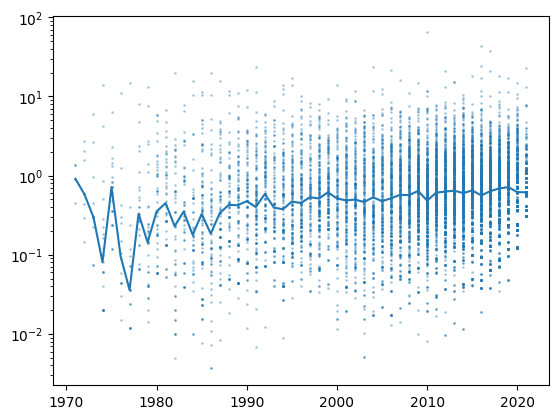

In [33]:
import numpy as np
import matplotlib.pyplot as plt
plt.scatter(relative_citation["year"],relative_citation["weights"], s=1, alpha = 0.3)
plt.plot(list(range(1971,2022)),relative_citation.groupby(by="year")["weights"].median())
plt.yscale("log")